# SVM, KNN AND XGBOOST

In [175]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [176]:
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [177]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [178]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [180]:
df.shape

(150, 4)

In [181]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [182]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [183]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

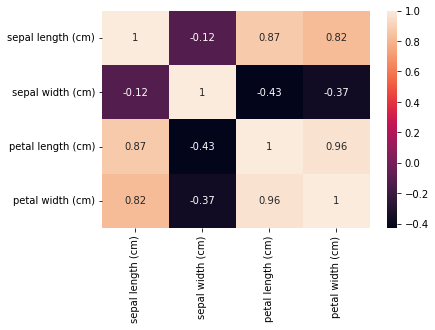

In [184]:
sns.heatmap(df.corr(),annot=True)

In [185]:
df['target']=iris.target

In [186]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [187]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [188]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [189]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [190]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [191]:
df['flower_name']=df.target.apply(lambda x : iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [192]:
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [193]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name'],
      dtype='object')

In [194]:
x=iris.data

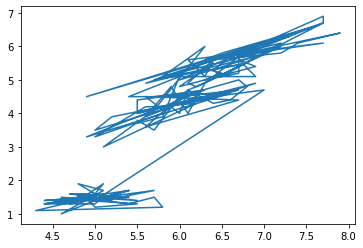

In [195]:
plt.plot(df['sepal length (cm)'],df['petal length (cm)'])

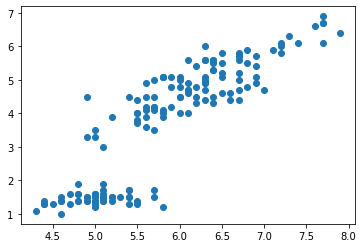

In [196]:
plt.scatter(x=df['sepal length (cm)'],y=df['petal length (cm)'])

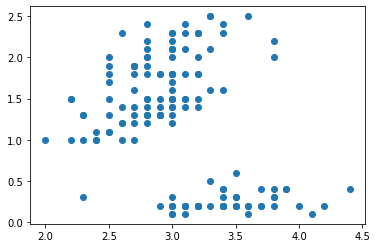

In [197]:
plt.scatter(x=df['sepal width (cm)'],y=df['petal width (cm)'])

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [200]:
xtrain

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [246]:
scaler.mean_

array([ 2.85062979e-15, -1.07004352e-15, -3.59500789e-16,  7.82442894e-17])

In [247]:
scaler.var_

array([1., 1., 1., 1.])

In [248]:
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)

In [249]:
xtest

array([[-0.10694994, -0.55721505,  0.70793846,  1.51006688],
       [ 0.1222285 , -1.92315077,  0.09545238, -0.29318114],
       [-0.45071761,  2.6299683 , -1.35224199, -1.32360858],
       [ 1.6118884 , -0.32955909,  1.37610509,  0.7372463 ],
       [-1.02366372,  0.80872067, -1.29656144, -1.32360858],
       [ 0.46599617,  0.58106472,  1.20906343,  1.63887031],
       [-1.02366372,  1.03637663, -1.40792255, -1.19480515],
       [ 0.92435306,  0.12575281,  0.48521625,  0.35083601],
       [ 1.03894229, -0.55721505,  0.5408968 ,  0.22203258],
       [ 0.23681773, -0.55721505,  0.09545238,  0.09322915],
       [ 0.23681773, -1.01252695,  0.98634122,  0.22203258],
       [ 0.5805854 ,  0.35340877,  0.37385514,  0.35083601],
       [ 0.23681773, -0.55721505,  0.48521625, -0.03557428],
       [ 0.69517462, -0.55721505,  0.42953569,  0.35083601],
       [ 0.23681773, -0.32955909,  0.48521625,  0.22203258],
       [-1.13825295,  1.26403258, -1.35224199, -1.45241201],
       [ 0.1222285 , -0.

In [250]:
from sklearn.svm import SVC

In [251]:
svm=SVC(kernel='rbf', random_state=0,gamma=.10,C=1.0)
svm.fit(xtrain,ytrain)

SVC(gamma=0.1, random_state=0)

In [252]:
svm.score(xtrain, ytrain)


0.9714285714285714

In [253]:
svm.score(xtest,ytest)

0.9777777777777777

In [254]:
svm.intercept_

array([ 0.06116637, -0.02584762, -0.09698133])

In [255]:
yhat=svm.predict(xtest)
yhat

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [256]:
list(zip(yhat,ytest))

[(2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (2, 2),
 (1, 1),
 (0, 0),
 (2, 1),
 (1, 1),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (0, 0)]

In [257]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [258]:
confusion_matrix(ytest,yhat)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

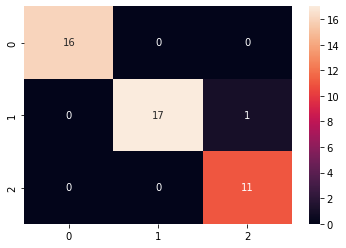

In [259]:
sns.heatmap(confusion_matrix(ytest,yhat),annot=True)

In [260]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [261]:
accuracy_score(ytest,yhat)

0.9777777777777777

# KNN 

In [262]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15 ,p=2, metric='minkowski')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=15)

In [263]:
knn.score(xtrain,ytrain)

0.9523809523809523

we can figure out best value for k by using grid search cv or k fold cross validation

In [264]:
knn.score(xtest,ytest)

0.9777777777777777

y_hat=knn.predict(scaler.transform(xtest))
y_hat

In [265]:
y_hat=knn.predict(xtest) 
y_hat

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [266]:
list(zip(ytest,y_hat))

[(2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (2, 2),
 (1, 1),
 (0, 0),
 (1, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (0, 0)]

In [267]:
confusion_matrix(ytest,y_hat)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

Text(33.0, 0.5, 'truth')

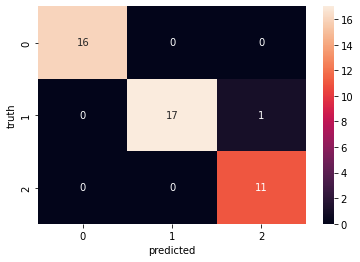

In [268]:
sns.heatmap(confusion_matrix(ytest,y_hat),annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [269]:
len(xtest)

45

In [270]:
accuracy_score(ytest,y_hat)

0.9777777777777777

In [271]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
print(classification_report(ytest,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# XGBOOST

In [272]:
import xgboost as xgb
xgb_cl=xgb.XGBClassifier()
xgb_cl=xgb_cl.fit(xtrain,ytrain)

In [273]:
xgb_cl.score(xtest,ytest)

0.9777777777777777

In [274]:
xgb_cl.score(xtrain,ytrain)

1.0

In [275]:
hat=xgb_cl.predict(xtest)
hat

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [276]:
confusion_matrix(ytest,hat)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

Text(33.0, 0.5, 'truth')

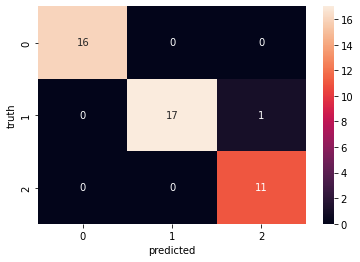

In [277]:
sns.heatmap(confusion_matrix(ytest,hat),annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')


In [278]:
print(classification_report(ytest,hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [279]:
accuracy_score(ytest,hat)

0.9777777777777777